<a href="https://colab.research.google.com/github/chacacaliza/Pemodelan-Data/blob/master/Pemodelan_Data_HealthCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
hcare = pd.read_csv('/media/healthcare-dataset-stroke-data.csv')

In [ ]:
hcare.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
hcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
hcare.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

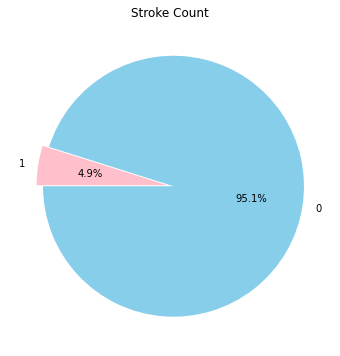

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Stroke Count")
g = plt.pie(hcare.stroke.value_counts(),explode=(0.025,0.025), labels=hcare.stroke.value_counts().index, colors=['skyblue', 'pink'],autopct='%1.1f%%', startangle=180)

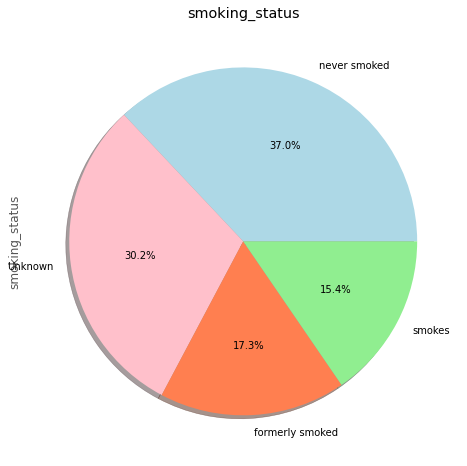

In [ ]:
import matplotlib as mpl
mpl.style.use(['ggplot'])

col = hcare['smoking_status'];
target_count = col.value_counts()
plt.figure( figsize=(10,8))

target_count.plot(autopct='%1.1f%%', kind='pie', shadow=True,title='smoking_status', colors = ['lightblue','pink','coral','lightgreen']);


In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

data=go.Pie(labels=hcare.smoking_status, values = hcare.stroke)
fig = go.Figure(data=data)
iplot(fig)

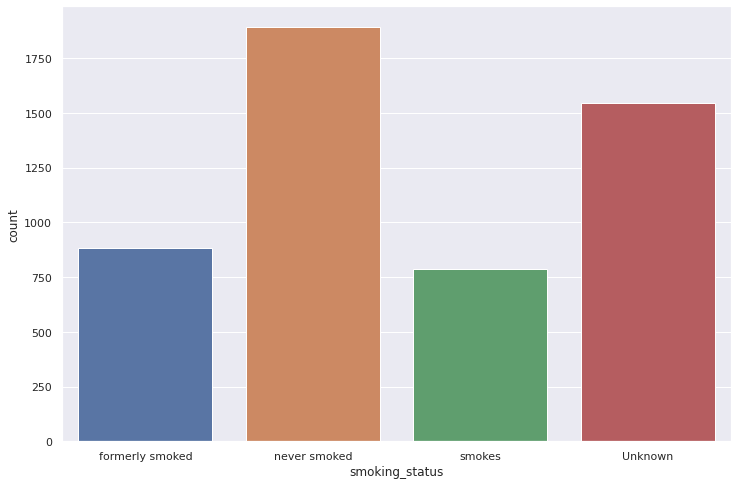

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="smoking_status", data=hcare)

<Figure size 1080x864 with 0 Axes>

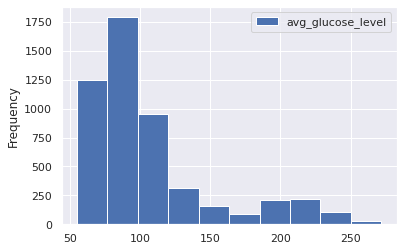

In [ ]:
hcare[["avg_glucose_level"]].plot.hist(bins=10)

Text(0, 0.5, 'age')

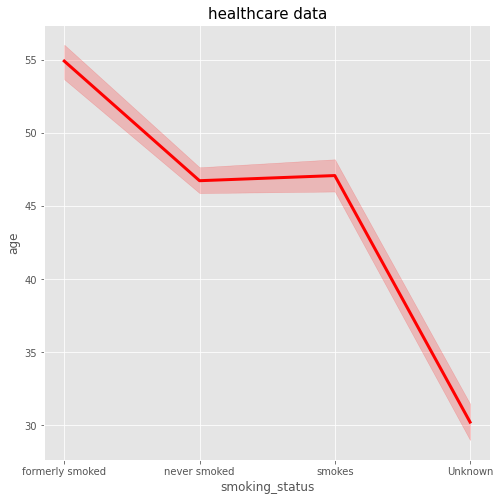

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame(hcare[hcare['smoking_status']=='health care dataset'])
data = hcare.groupby('smoking_status')['age'].sum().reset_index()

plt.figure(figsize=(8,8))
sns.lineplot(x='smoking_status', y='age', data=hcare, lw=3, color='red')
plt.title('healthcare data', fontsize=15)
plt.xlabel('smoking_status')
plt.ylabel('age')

Text(0, 0.5, 'age')

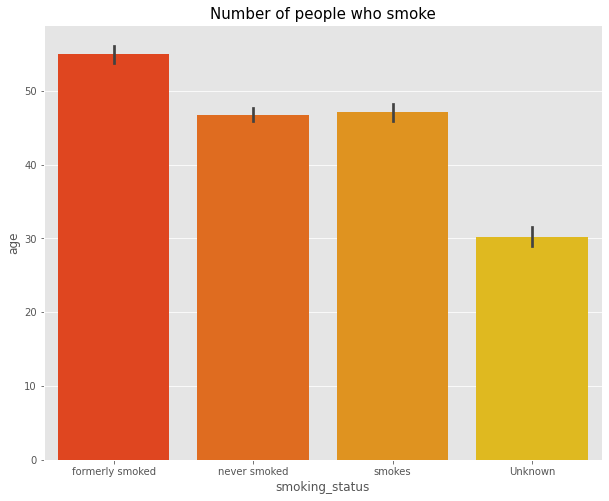

In [ ]:
import seaborn as sns

data = pd.DataFrame(hcare.groupby('smoking_status')['age'].sum().sort_values(ascending=False).reset_index())

plt.figure(figsize=(10,8))
sns.barplot(data=hcare, x='smoking_status', y='age', palette='autumn')
plt.title('Number of people who smoke', fontsize=15)
plt.xlabel('smoking_status')
plt.ylabel('age')

Text(0, 0.5, 'stroke')

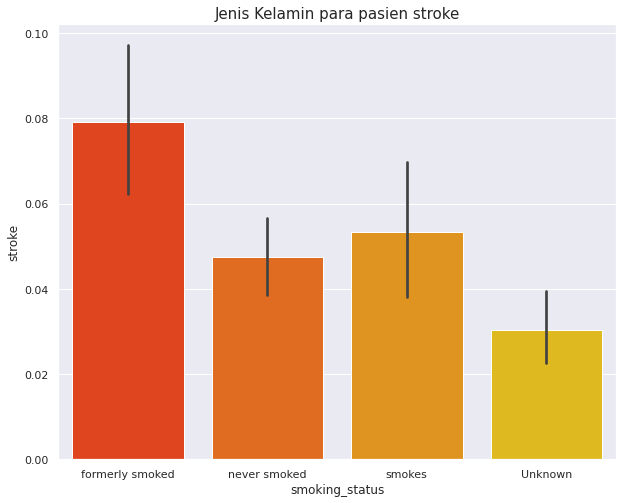

In [ ]:
import seaborn as sns

data = pd.DataFrame(hcare.groupby('smoking_status')['stroke'].sum().sort_values(ascending=False).reset_index())

plt.figure(figsize=(10,8))
sns.barplot(data=hcare, x='smoking_status', y='stroke', palette='autumn')
plt.title('Jenis Kelamin para pasien stroke', fontsize=15)
plt.xlabel('smoking_status')
plt.ylabel('stroke')

In [ ]:
import numpy as np
from scipy.stats import norm

In [ ]:
std = np.std(hcare['avg_glucose_level'], ddof=1)
mean = np.mean(hcare['avg_glucose_level'])
median = np.median(hcare['avg_glucose_level'])

In [ ]:
std = np.std(hcare['bmi'], ddof=1)
mean = np.mean(hcare['bmi'])
median = np.median(hcare['bmi'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


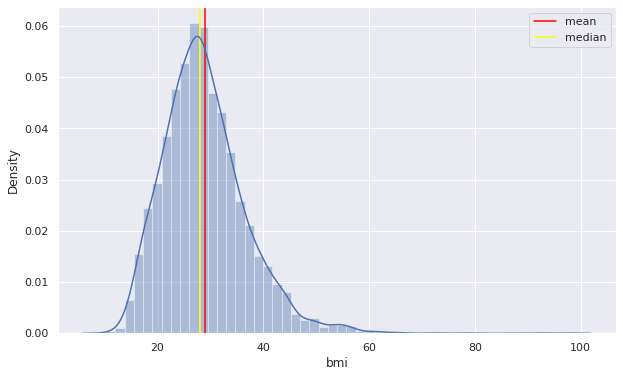

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.axvline(hcare['bmi'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(hcare['bmi'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(hcare['bmi'])
plt.legend()

In [ ]:
hcare['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


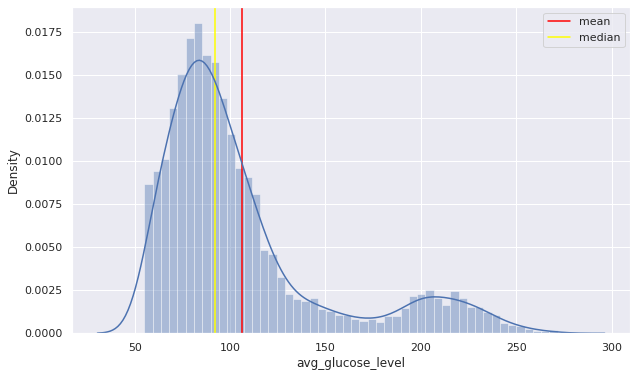

In [ ]:
plt.figure(figsize = (10, 6))
plt.axvline(hcare['avg_glucose_level'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(hcare['avg_glucose_level'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(hcare['avg_glucose_level'])
plt.legend()

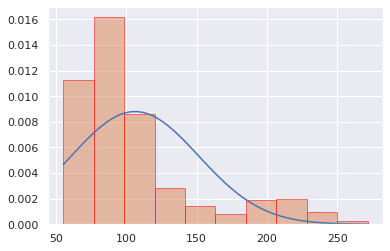

In [ ]:
domain = np.linspace(np.min(hcare['avg_glucose_level']), np.max(hcare['avg_glucose_level']))
plt.plot(domain, norm.pdf(domain,mean,std))
plt.hist(hcare['avg_glucose_level'], edgecolor='red', alpha=0.5,density=True)
plt.show()

In [ ]:
hcare['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

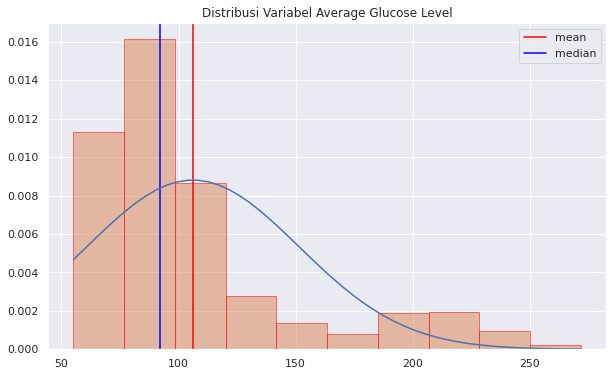

In [ ]:
plt.figure(figsize = (10, 6))
domain = np.linspace(np.min(hcare['avg_glucose_level']), np.max(hcare['avg_glucose_level']))
plt.axvline(mean, color = 'red', label = 'mean')
plt.axvline(median, color = 'blue', label = 'median')
plt.plot(domain, norm.pdf(domain,mean,std))
plt.hist(hcare['avg_glucose_level'], edgecolor='red', alpha=0.5
,density=True)
plt.title('Distribusi Variabel Average Glucose Level')
plt.legend()
plt.show()


In [ ]:
std = np.std(hcare['bmi'], ddof=1)
mean = np.mean(hcare['bmi'])

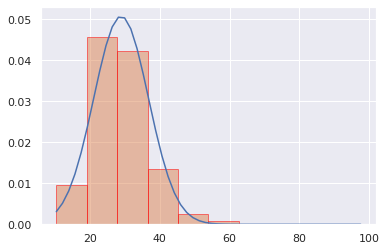

In [ ]:
domain = np.linspace(np.min(hcare['bmi']), np.max(hcare['bmi']))
plt.plot(domain, norm.pdf(domain,mean,std))
plt.hist(hcare['bmi'], edgecolor='red', alpha=0.5,density=True)
plt.show()